In [ ]:
import pandas as pd
# load the dataset
df = pd.read_csv('C:/Users/Hyagiriva/OneDrive/Desktop/docs/IPPROJECT/final year project/SentimentAnalysis-master/household_power_consumption.txt', delimiter=';', low_memory=False)
# grab time series of electricity usage
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()
# set the index as and sort by date and time
df = df.set_index('date_time').sort_index()
# resample to hourly frequency
df_hour = df.resample('1H').mean()
# create shifted time series
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)
# create month/seasonality as a feature
df_hour['month'] = df_hour.index.month
# drop missing data
df_hour = df_hour.dropna()
# split train test sets
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

: 

In [3]:
df_train.head()

,electricity_usage,electricity_usage_1hr_lag,electricity_usage_2hr_lag,electricity_usage_3hr_lag,electricity_usage_4hr_lag,electricity_usage_5hr_lag,electricity_usage_6hr_lag,electricity_usage_7hr_lag,electricity_usage_8hr_lag,month
date_time,,,,,,,,,,
2006-12-17 01:00:00,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,4.222889,12
2006-12-17 02:00:00,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,12
2006-12-17 03:00:00,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,12
2006-12-17 04:00:00,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,12
2006-12-17 05:00:00,1.996733,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,12


In [4]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17+35-LTS-2724, mixed mode, sharing)
  Starting server from C:\Users\Hyagiriva\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HYAGIR~1\AppData\Local\Temp\tmp7372yduy
  JVM stdout: C:\Users\HYAGIR~1\AppData\Local\Temp\tmp7372yduy\h2o_Hyagiriva_started_from_python.out
  JVM stderr: C:\Users\HYAGIR~1\AppData\Local\Temp\tmp7372yduy\h2o_Hyagiriva_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_Hyagiriva_zqruub
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.982 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [5]:
h2o_frame = h2o.H2OFrame(df_train)
x = h2o_frame.columns
y = 'electricity_usage'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=666)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |
23:39:19.395: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),11/22
# GBM base models (used / total),8/16
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/3
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [7]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_1_20230430_233918,0.344271,0.586746,0.399325,0.242856,0.344271,720,0.021844,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20230430_233918,0.344361,0.586823,0.399397,0.242869,0.344361,761,0.026379,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230430_233918,0.344441,0.586891,0.399648,0.242903,0.344441,427,0.013233,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230430_233918,0.344469,0.586915,0.399351,0.242942,0.344469,479,0.013827,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230430_233918,0.344673,0.587088,0.399687,0.243033,0.344673,707,0.010333,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230430_233918,0.344979,0.587349,0.400373,0.243109,0.344979,807,0.009285,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230430_233918,0.34679,0.588889,0.402713,0.24391,0.34679,574,0.008383,StackedEnsemble
GBM_1_AutoML_1_20230430_233918,0.347185,0.589224,0.402947,0.244179,0.347185,1133,0.008417,GBM
GBM_2_AutoML_1_20230430_233918,0.348507,0.590345,0.404855,0.244573,0.348507,521,0.006035,GBM
GBM_5_AutoML_1_20230430_233918,0.3501,0.591692,0.406301,0.245783,0.3501,580,0.009756,GBM


In [8]:
from h2o.model.regression import h2o_mean_squared_error

h2o_frame_test = h2o.H2OFrame(df_test)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(df_test[['electricity_usage']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.3480634682796415

<AxesSubplot:xlabel='date_time'>

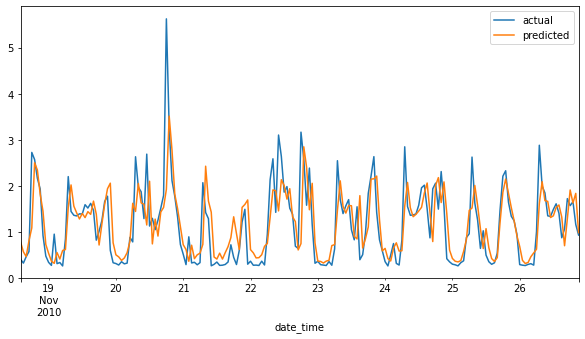

In [9]:
h2o_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred.as_data_frame().to_numpy().ravel()})
h2o_compare.plot(figsize=(10, 5))